In [1]:
#!/Users/francoisczarny/anaconda/bin/python2.7
#-*-coding : utf-8-*

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Import jeu de données pour le test de la fonction : 

In [2]:
my_path = "/Users/francoisczarny/Documents/Cours_M2/analyse de donnees (B.michel)/projet ECG"
data_path_train = my_path + "/input_training.csv"
check_res = my_path + "/training_output.csv"

x_train = pd.read_csv(data_path_train, header = 0, index_col=0)
y_train = pd.read_csv(check_res,sep=";", header = 0, index_col=0)

## Définition de la fonction classifier dans le cadre de classifications supervisées : 

Cellule suivante utile pour essayé l'intégration d'un nouveau classifier

In [40]:
def select_classifier(x_train, y_train, nb_cv=3, type_scoring = None, print_graph = True):
    """
    Input : - pd.DataFrame : table sur laquelle on effectue le clustering privé de la colonne des labels.
            - list : liste des classe auxquelles appartiennent les observations
            - int : nombre de cross-validation à effectuer, 3 par défaut.
            - scoring method : méthode de scoring répertoriée dans scikit-learn, None par défaut.
            - bool : Précise si l'on veut afficher le graph comparatif des différentes méthode de classification.
    
    Description : renvoie une table des scores réalisés par les classifiers avec le score de silhouette et le VIF. 
    
    Output : pd.DataFrame (ou un graph)
    """
    # import de tous les classifiers nécessaires à la comparaison : 
    from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
    from sklearn.svm import SVC
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier       # ajout d'autre 
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.neighbors.nearest_centroid import NearestCentroid
    from sklearn.gaussian_process import GaussianProcessClassifier
    from sklearn.neural_network import MLPClassifier
    
    import sklearn.cross_validation as cv
    
    # dictionnaire destiné à contenir les scores : 
    scores = {}
    # Entrainement des différents classifier : 
    RF, GB, ada = RandomForestClassifier(), GradientBoostingClassifier(), AdaBoostClassifier()
    ET, svc, LR, DT = ExtraTreesClassifier(), SVC(), LogisticRegression(), DecisionTreeClassifier()
    KNN, GPC, MLP = KNeighborsClassifier(), GaussianProcessClassifier(), MLPClassifier()
    KNCentroid = NearestCentroid()
    # On stocke les classifier dans une liste : 
    list_clf = [ RF, GB, ada, ET, svc, LR, DT, KNN, GPC, MLP, KNCentroid]
    # On calcule les score ainsi obtenus : 
    scores = {}
    for clf in list_clf:
        scores[str(clf).split('(')[0]] = cv.cross_val_score(clf, x_train, y_train, cv = nb_cv, n_jobs=2, \
                                                           scoring = type_scoring).mean()
    # plot le graph comparatif des scores entre chaque classifier : 
    if print_graph == True : 
        pd.DataFrame([scores]).plot(kind = "bar", \
                                    color = plt.cm.rainbow(np.linspace(0, 1, len(scores))),\
                                    figsize = (20,10))
        
    DF_sc = pd.DataFrame([scores], index=['score']).T
    
    return DF_sc.sort_values('score', ascending = False)

##### Test sur un dataset à deux classes : 

,score
GradientBoostingClassifier,0.728000
AdaBoostClassifier,0.673967
RandomForestClassifier,0.635030
ExtraTreesClassifier,0.633963
MLPClassifier,0.628970
LogisticRegression,0.591981
NearestCentroid,0.586014
KNeighborsClassifier,0.580976
DecisionTreeClassifier,0.572971
GaussianProcessClassifier,0.544964


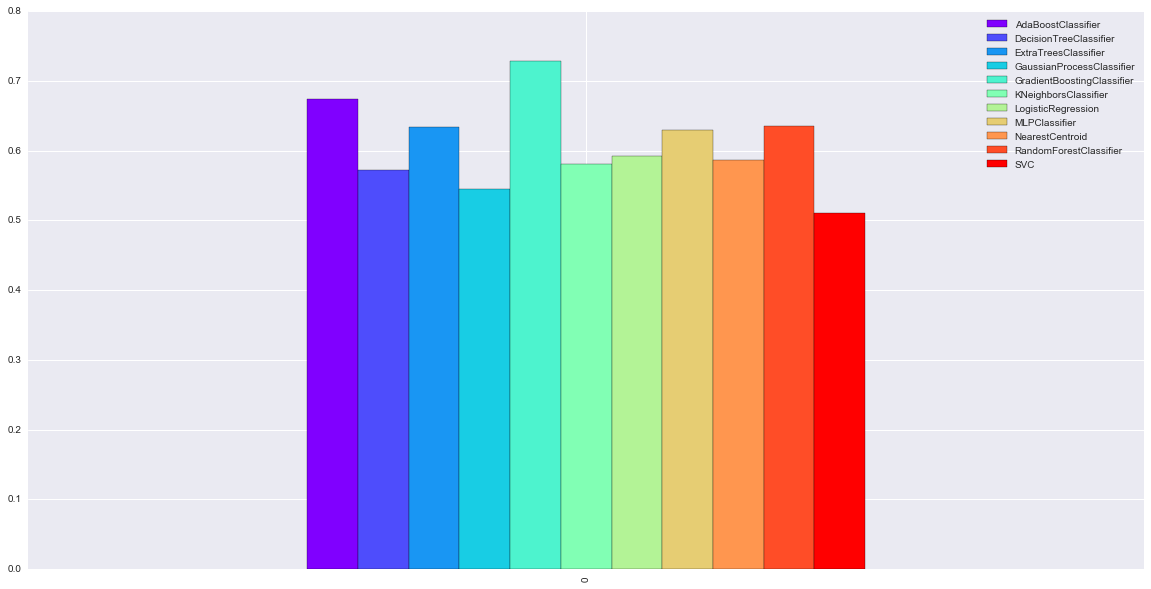

In [41]:
select_classifier(x_train, list(y_train['TARGET']), print_graph=True)

In [24]:
%timeit select_classifier(x_train, list(y_train['TARGET']), print_graph=False)

The slowest run took 5.02 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 3min 38s per loop


##### Test sur un data set multi classes : 

In [42]:
# Test sur un sample multiclasses : 
from sklearn.datasets import make_classification

Xtest, Ytest = make_classification(n_samples=100, n_features=100, n_informative=30, n_classes=4, random_state=1)

,score
LogisticRegression,0.570418
NearestCentroid,0.493759
MLPClassifier,0.487509
KNeighborsClassifier,0.478878
ExtraTreesClassifier,0.379230
GradientBoostingClassifier,0.348088
AdaBoostClassifier,0.329248
SVC,0.312040
DecisionTreeClassifier,0.288844
RandomForestClassifier,0.281683


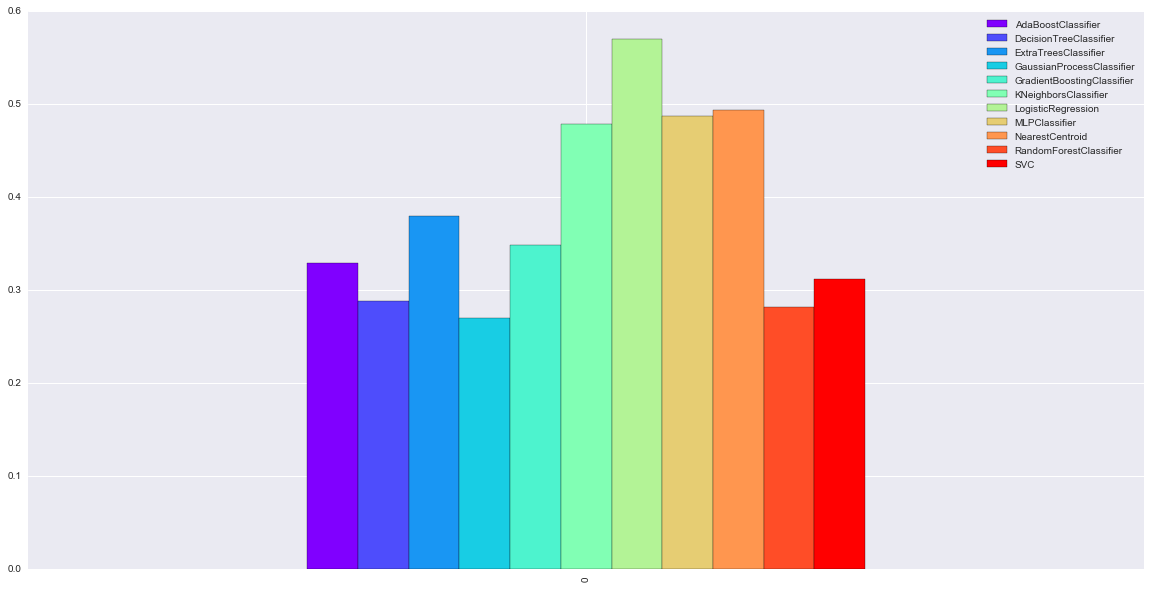

In [44]:
select_classifier(Xtest, Ytest)

## Définition de la fonction pour le choix de l'algo de clustering sur la base des scores de silhouette ou du VIF :

A la différence du précédent celui-ci s'utilisera dans le cadre de la classification non-supervisée

In [ ]:
def select_clust(x_train):
    """
    Input : pd.DataFrame des données à "clusteriser"
    
    Description : Renvoie les scores de silhouette et du VIF associé aux clustering
    
    Output : pd.DataFrame des scores
    """
    pass

#### Définition de la fonction de choix d'un régresseur sur les données : 

Ici, l'erreur sera sous-estimée car on ne calculera l'erreur qu'avec le train set. Ainsi, les scores affichier seront surévalués pour que cela ne prenne pas un temps trop long.

In [ ]:
def select_regressor(x_train, y_train):
    """
    Input : -
            -
    
    Description :
    
    Output : 
    """
    pass

#### Définition de la fonction features selection : 

In [3]:
def select_features():
    """
    Input : 
    
    Description : 
    
    Output : 
    """
    pass